## Decision Tree - Away Stats Only 

In [35]:
# import required package for data handling
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import the packages needed for the Decision Tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree
import matplotlib.pyplot as plt

In [36]:
# read in the csv
df = pd.read_csv('../csv_files/Away_Only_Classification.csv',index_col=0)
df.head(2)

,A_FTPct,A_EFGPct,A_ThreePARt,A_FTR,A_REBPct,A_BLKPct,A_AST_TOV_Ratio,Target
0,0.952,0.628049,0.463415,0.256098,0.493827,0.109890,2.142857,1
1,0.870,0.542683,0.414634,0.280488,0.461538,0.053191,2.266667,1


In [37]:
# Splitting up our data into variable and target data
X = df.iloc[:, :-1] # Variable
Y = df.Target # Target

In [38]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

In [39]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3, max_features=7, criterion='gini', splitter='best', random_state=2019)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [40]:
# Model Accuracy, how often is the Decision Tree correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy: 0.7457381211461733
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1622
           1       0.67      0.76      0.71      1135

    accuracy                           0.75      2757
   macro avg       0.74      0.75      0.74      2757
weighted avg       0.75      0.75      0.75      2757

[[1199  423]
 [ 278  857]]


In [41]:
# Calculating accuracy, F1 score, and AUC 
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred))
print('F1_Score:', metrics.f1_score(Y_test, Y_pred, average='weighted'))
print('AUC:', metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

Accuracy: 0.7457381211461733
F1_Score: 0.7474228757383996
AUC: 0.7471384650483169


In [42]:
# Displaying the feature importance
# define the feature importance variable 
# use the feature importance values from the decision tree above, sort in descending order 
feature_imp = pd.Series(clf.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
feature_imp

A_EFGPct           0.721977
A_REBPct           0.245228
A_AST_TOV_Ratio    0.032795
A_BLKPct           0.000000
A_FTR              0.000000
A_ThreePARt        0.000000
A_FTPct            0.000000
dtype: float64

In [43]:
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus

#dot_data = StringIO()

#export_graphviz(clf, out_file=dot_data,  
 #               filled=True, rounded=True,
  #              special_characters=True)

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

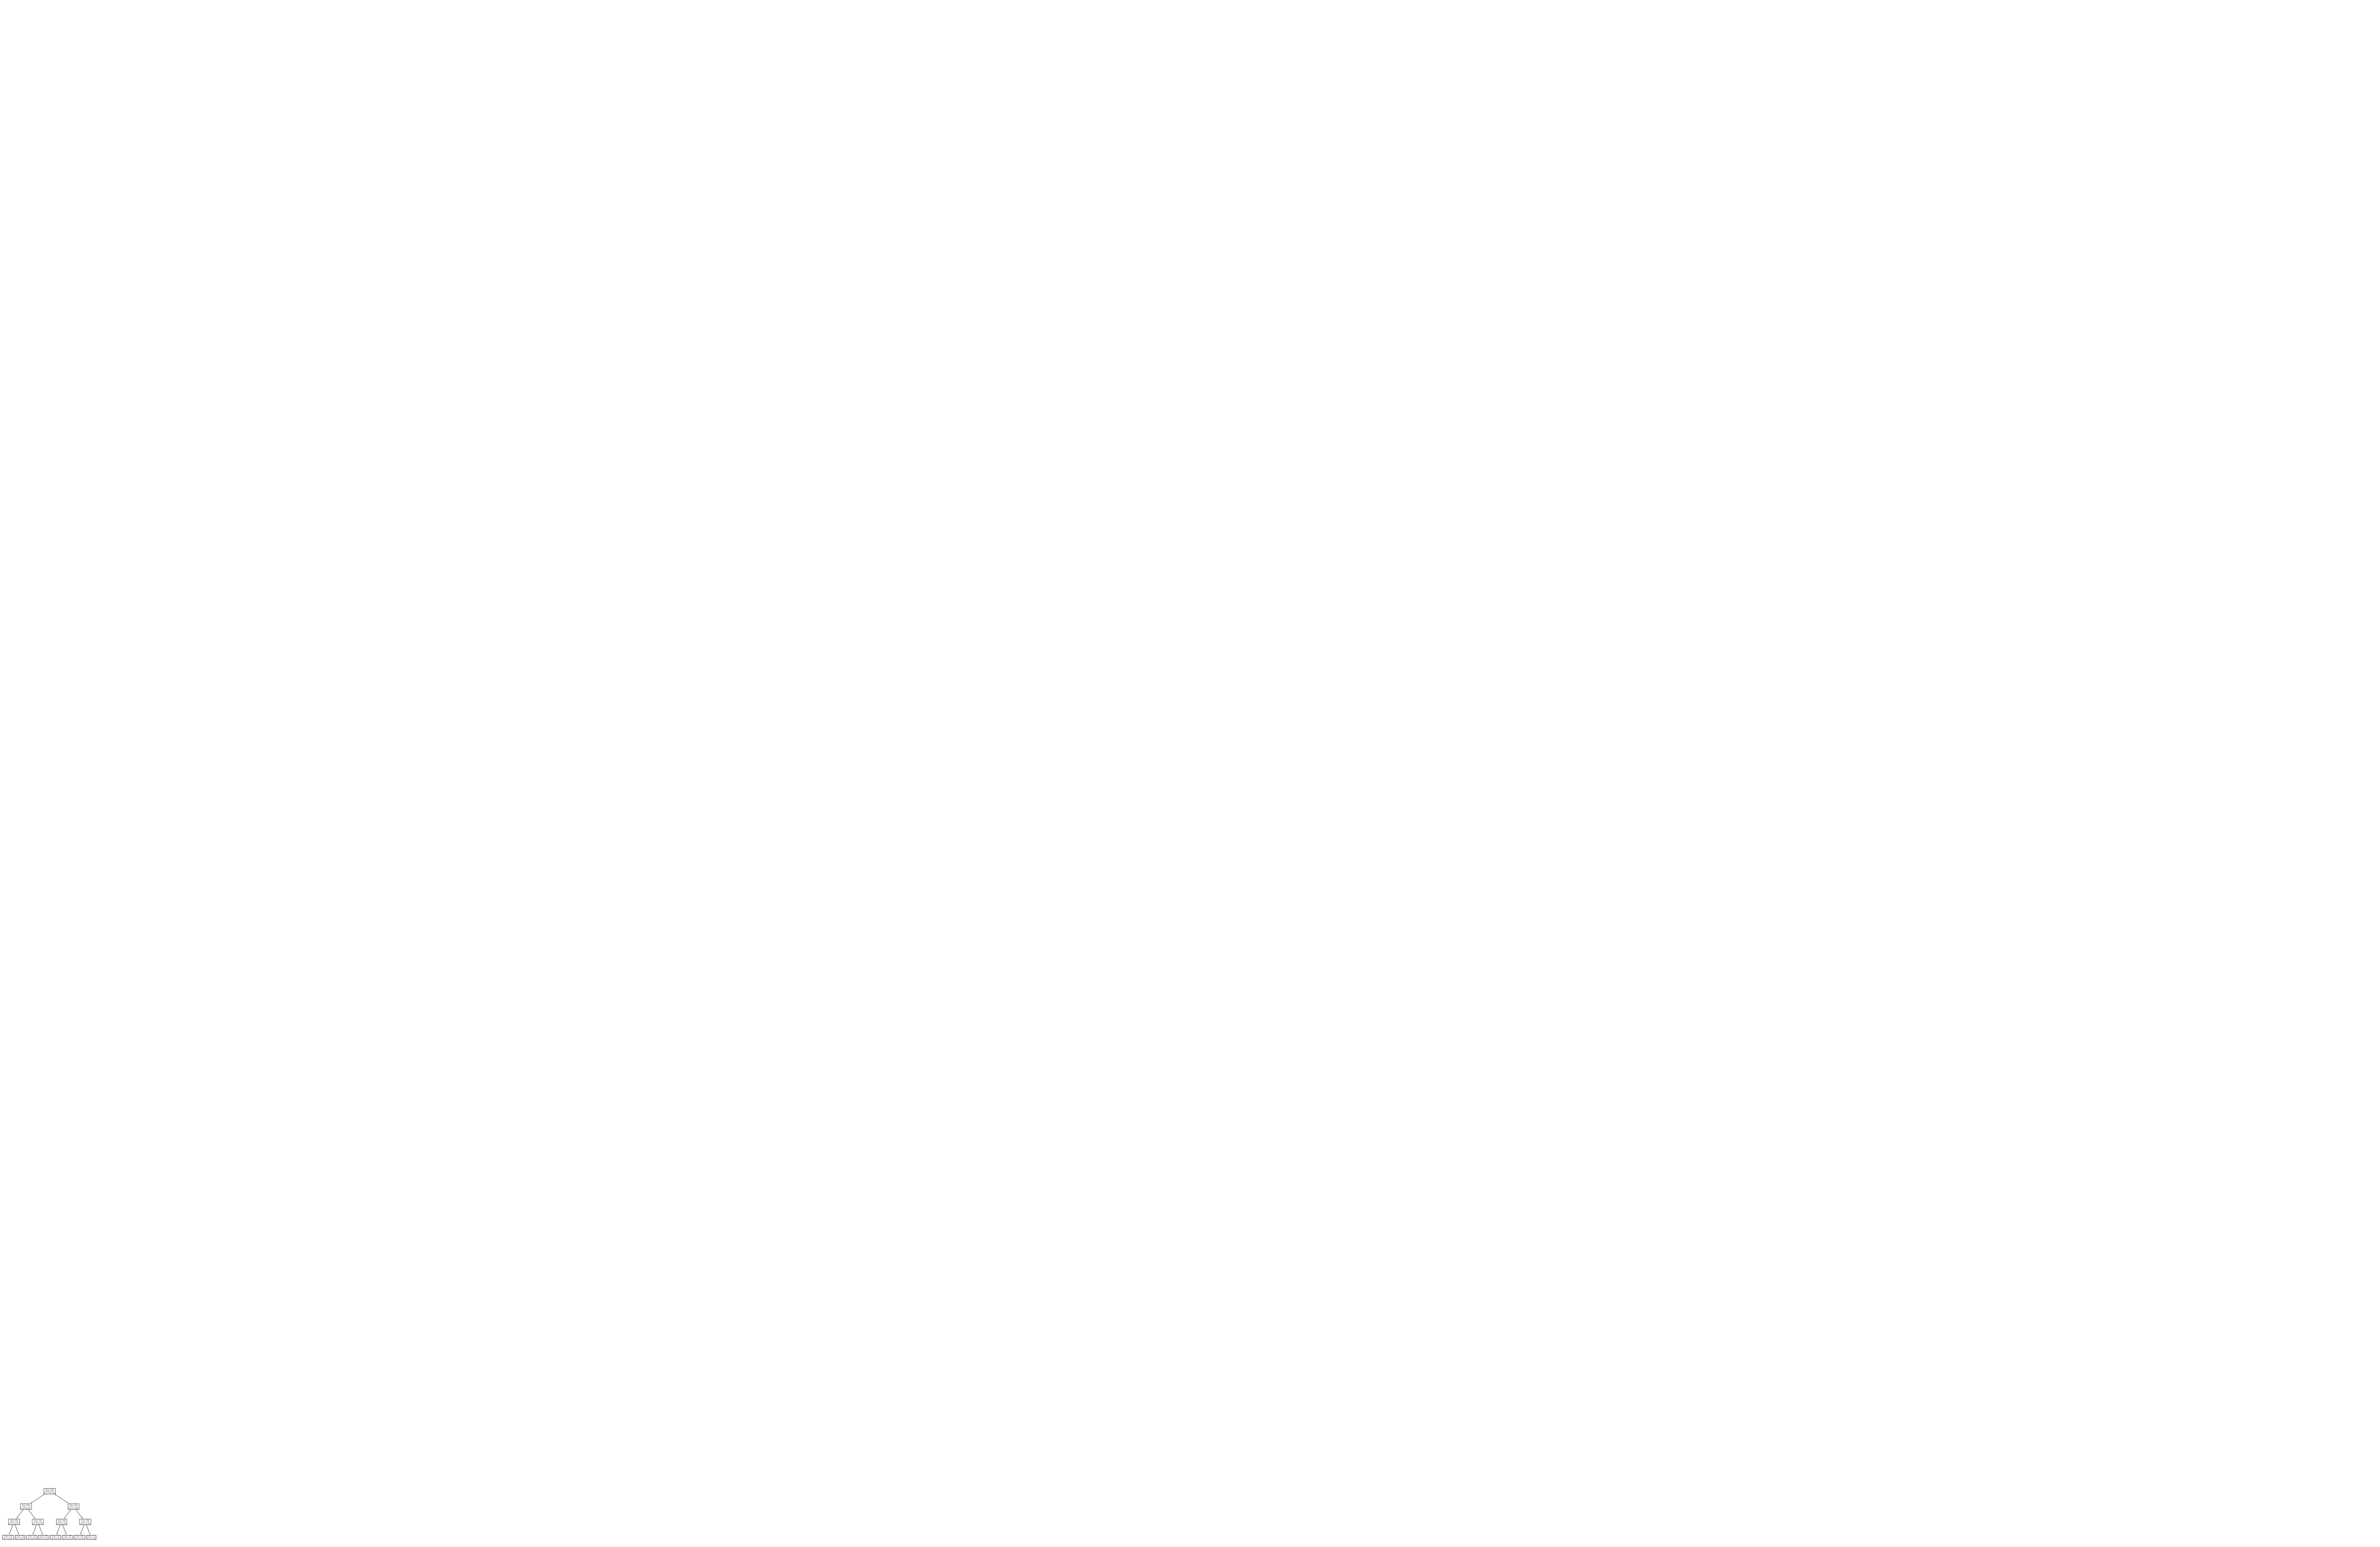

In [33]:
from sklearn import tree
tree.plot_tree(clf)
fig = plt.gcf()
fig.set_size_inches(150,100)
fig.savefig('tree_new_away.pdf', clear=True, quality=100)

In [46]:
X.iloc[:, 6]

0       2.142857
1       2.266667
2       1.812500
3       1.727273
4       3.166667
5       2.500000
6       2.000000
7       1.100000
8       2.076923
9       1.461538
10      1.769231
11      1.416667
12      1.000000
13      4.000000
14      1.066667
15      1.470588
16      2.083333
17      3.666667
18      1.266667
19      1.357143
20      3.166667
21      1.000000
22      3.571429
23      2.181818
24      1.461538
25      2.625000
26      3.375000
27      1.533333
28      1.400000
29      1.666667
          ...   
9160    1.000000
9161    1.750000
9162    1.642857
9163    1.266667
9164    2.666667
9165    0.857143
9166    2.000000
9167    1.692308
9168    1.571429
9169    1.117647
9170    2.222222
9171    1.545455
9172    1.047619
9173    1.444444
9174    1.545455
9175    2.181818
9176    1.357143
9177    1.000000
9178    1.466667
9179    1.222222
9180    1.333333
9181    1.250000
9182    0.736842
9183    0.950000
9184    1.400000
9185    0.875000
9186    1.055556
9187    1.6000

In [54]:
df.count()

H_FTPct            9844
H_EFGPct           9844
H_ThreePARt        9844
H_FTR              9844
H_REBPct           9844
H_BLKPct           9844
H_AST_TOV_Ratio    9844
A_FTPct            9844
A_EFGPct           9844
A_ThreePARt        9844
A_FTR              9844
A_REBPct           9844
A_BLKPct           9844
A_AST_TOV_Ratio    9844
Target             9844
dtype: int64